##### Veriler her zaman düzenli bir şekilde gelmeyebilir. Sayısal yerine kategorik veriler de olabilir. Bu notebookta düzenli olmayan verileri ele alacağız.

In [1]:
data = [{'not':85, 'kardes':4, 'ders':'mat'},
       {'not':70, 'kardes':3, 'ders':'ing'},
       {'not':65, 'kardes':3, 'ders':'mat'},
       {'not':60, 'kardes':2, 'ders':'fiz'}]

In [ ]:
{'mat':1, 'ing':2, 'fiz':3}

##### Kategorik verileri sayılarla temsil etmeliyiz ki işlem yapabilelim. Fakat bu yaklaşım scikit-learn için pek anlamlı değildir. Yani bunları kategorileri temsil eden sayılar olarak değil de normal sayılar olarak algılayacaktır. Scikit-learn'ün bunları kategorik olarak algılaması için "One Hot Encoding" denen bir teknik kullanılır.

In [5]:
from sklearn.feature_extraction import DictVectorizer

In [8]:
vek = DictVectorizer(sparse=False, dtype=int)

In [9]:
vek.fit_transform(data)

array([[ 0,  0,  1,  4, 85],
       [ 0,  1,  0,  3, 70],
       [ 0,  0,  1,  3, 65],
       [ 1,  0,  0,  2, 60]])

In [10]:
# Görüldüğü üzere bu teknik kategorilere göre 0 ve 1 şeklinde kodluyor.

In [11]:
vek.get_feature_names()

['ders=fiz', 'ders=ing', 'ders=mat', 'kardes', 'not']

In [12]:
# Kategoriler fazla olduğunda boyut da artacaktır. Bunu önlemek için
# sparse:True yapmalıyız.

In [13]:
vek = DictVectorizer(sparse=True, dtype=int)
vek.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

##### Şimdi "text" ifadelerin nasıl sayısal kodlandığına bakalım. Bu örnekte sosyal medya yorumlarını kodlamak olacaktır.

In [15]:
veri = ['hava iyi',
       'iyi insan',
       'hava bozuk']

##### Bu verileri kelime sayısına göre kodlamak için her bir kelimeyi sütun şeklinde yapmalıyız. Bu işlem elle yapılabilir fakat çoklu verilerde uzun sürecektir.

##### Bunu scikit-learn ile yapabilmemiz için "CountVektorizer" denen sınıfı kullanmamız gerekiyor.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vek = CountVectorizer()

In [18]:
X = vek.fit_transform(veri)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [19]:
import pandas as pd

In [20]:
pd.DataFrame(X.toarray(), columns=vek.get_feature_names())

,bozuk,hava,insan,iyi
0,0,1,0,1
1,0,0,1,1
2,1,1,0,0


##### Özniteliklerin diğer kullanılan tipi girdi verilerinden polinomsal öznitelikleri oluşturmaktır. Bunu göstermek için öncelikle gerekli kütüphaneleri import edelim:

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x=np.array([1,2,3,4,5])
y=np.array([5,3,1,2,7])

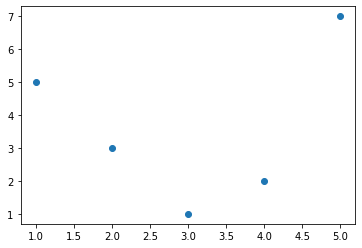

In [23]:
plt.scatter(x,y)

In [24]:
# Şimdi lineer regresyonu kullanarak bu grafiğe bir doğru uyduralım.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X=x[:,np.newaxis] # X'i 2 boyutlu işleme dönüştürme işlemi

In [27]:
model = LinearRegression().fit(X,y)

In [28]:
y_fit = model.predict(X)
y_fit

array([3. , 3.3, 3.6, 3.9, 4.2])

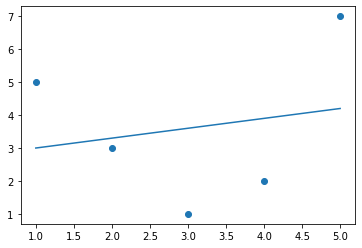

In [29]:
plt.scatter(x,y)
plt.plot(x,y_fit)

##### X ile y arasındaki ilişkiyi tanımlamak için daha gelişmiş bir modele ihtiyaç olduğunu grafikten anlıyoruz. Veriyi dönüştürerek modeli daha iyi hale getirebiliriz. Böylece extra öznitelik sütunu ekleyerek modele esneklik kazandırabiliriz. Bunun için gerekli sınıfı import edelim:

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
pol = PolynomialFeatures(degree=3, include_bias=False)

In [32]:
X2 = pol.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

##### Böylece veriyi dönüştürmüş olduk. Bu türetilen matrisin 1. sütunu X'i, 2. sütunu X^2'yi, 3. sütunu ise X^3'ü temsil ediyor. Bu genişletilmiş girdi ile hesap edilen lineer regresyon veri setine daha iyi uyacaktır. Şimdi bu X2 verisini kullanarak modeli kuralım:

In [33]:
model = LinearRegression().fit(X2,y)

In [34]:
y_fit = model.predict(X2)

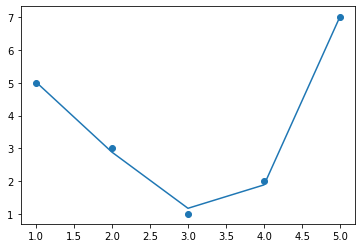

In [35]:
plt.scatter(x,y)
plt.plot(x,y_fit)

In [36]:
# Görüldüğü üzere model verilere daha iyi uyuyor.

##### Öznitelik mühendisliğin bir diğer gerekliliği de missing(kayıp) verileri ele almaktır.

In [37]:
from numpy import nan

In [38]:
X=np.array([[1,nan,3],
          [5,6,9],
          [4,5,2],
          [4,6,nan],
          [9,8,1]])
y=np.array([10,13,-2,7,-6])

##### NaN verileri doldurmak için sütun ortalaması tekniğini kullanacağız.

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
imp = SimpleImputer(strategy='mean')

In [42]:
X2 = imp.fit_transform(X)

In [43]:
X2

array([[1.  , 6.25, 3.  ],
       [5.  , 6.  , 9.  ],
       [4.  , 5.  , 2.  ],
       [4.  , 6.  , 3.75],
       [9.  , 8.  , 1.  ]])

##### Görüldüğü üzere eksik veriler sütun ortalamaları ile dolduruldu. Artık bu veri ile makine öğrenmesi modeli oluşturabiliriz.

In [46]:
model = LinearRegression().fit(X2,y)
model.predict(X2)

array([10.59852491, 13.45464873, -1.31399837,  4.99263952, -5.7318148 ])

##### Biraz önce yaptığımız aşamaları daha hızlı yapabiliriz. Yani kayıp veriler yerine ortalamayı kullanmayı, öznitelikleri 2. dereceye dönüştürmeyi ve bir lineer regresyonu fit etmeyi aynı anda yapabiliriz. Bunu yapmak için scikit-learn'de "Pipeline" kullanılır.

In [47]:
from sklearn.pipeline import make_pipeline

In [48]:
model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [49]:
model.fit(X,y)
print(y)
print(model.predict(X))

[10 13 -2  7 -6]
[10. 13. -2.  7. -6.]


In [ ]:
# Görüldüğü üzere bütün adımlar otomatik bir şekilde uygulandı.